Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8913 - loss: 0.3521 - val_accuracy: 0.9513 - val_loss: 0.2031
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9441 - loss: 0.2055 - val_accuracy: 0.9235 - val_loss: 0.2763
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9470 - loss: 0.2073 - val_accuracy: 0.9508 - val_loss: 0.1824
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9411 - loss: 0.2373 - val_accuracy: 0.9552 - val_loss: 0.1640
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9525 - loss: 0.1833 - val_accuracy: 0.9297 - val_loss: 0.2675
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9470 - loss: 0.2185 - val_accuracy: 0.9421 - val_loss: 0.2354
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9495 - loss: 0.1982 - val_accuracy: 0.9420 - val_loss: 0.2324
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9474 - loss: 0.2156 - 

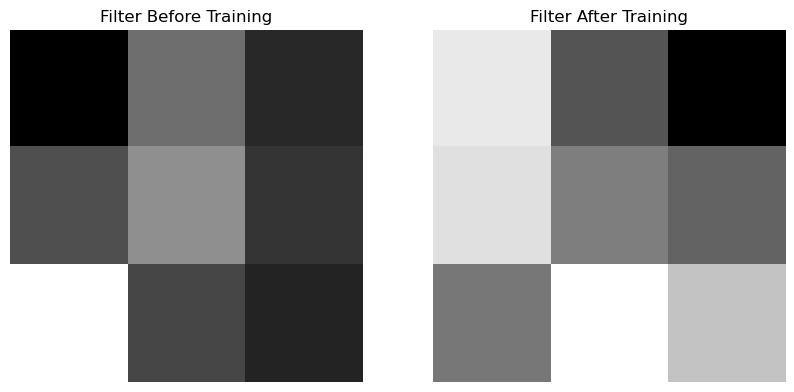

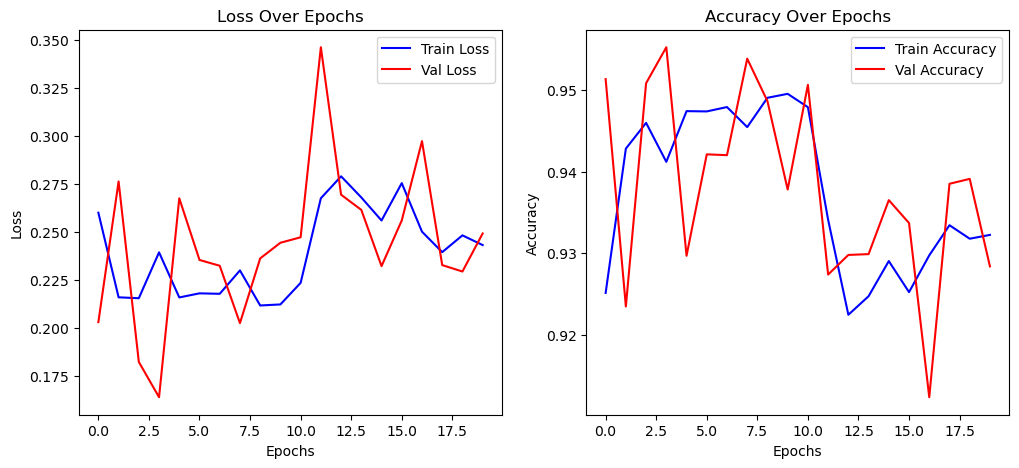

Final Test Accuracy: 0.9284


In [3]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.astype(np.float32) / 255.0
x_test = x_test.astype(np.float32) / 255.0

x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

inputs = tf.keras.Input(shape=(28, 28, 1))
conv_layer = tf.keras.layers.Conv2D(3, (3,3), activation='relu', name="conv_layer")(inputs)  
x = tf.keras.layers.MaxPooling2D(pool_size=(2,2))(conv_layer)  
x = tf.keras.layers.Flatten()(x) 
outputs = tf.keras.layers.Dense(10, activation='softmax')(x) 

model = tf.keras.Model(inputs=inputs, outputs=outputs)

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.05),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

conv_weights_before = model.get_layer("conv_layer").get_weights()[0]

history = model.fit(x_train, y_train, epochs=20, batch_size=32, validation_data=(x_test, y_test))

conv_weights_after = model.get_layer("conv_layer").get_weights()[0] 

fig, axes = plt.subplots(1, 2, figsize=(10, 5))

filter_index = 0 
axes[0].imshow(conv_weights_before[:, :, 0, filter_index], cmap='gray')
axes[0].set_title("Filter Before Training")
axes[0].axis("off")

axes[1].imshow(conv_weights_after[:, :, 0, filter_index], cmap='gray')
axes[1].set_title("Filter After Training")
axes[1].axis("off")

plt.show()

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

axes[0].plot(history.history['loss'], label='Train Loss', color='blue')
axes[0].plot(history.history['val_loss'], label='Val Loss', color='red')
axes[0].set_title("Loss Over Epochs")
axes[0].set_xlabel("Epochs")
axes[0].set_ylabel("Loss")
axes[0].legend()

axes[1].plot(history.history['accuracy'], label='Train Accuracy', color='blue')
axes[1].plot(history.history['val_accuracy'], label='Val Accuracy', color='red')
axes[1].set_title("Accuracy Over Epochs")
axes[1].set_xlabel("Epochs")
axes[1].set_ylabel("Accuracy")
axes[1].legend()

plt.show()

test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print(f"Final Test Accuracy: {test_acc:.4f}")
